<a href="https://colab.research.google.com/github/guberney/Covid_Colombia/blob/master/CovidColombia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  **Análisis de datos sobre el coronavirus en Colombia. **
Con el presente código se quiere abrir la oportunidad para que puedan realizar gráficos y análisis particuales de diferentes lugares de Colombia. Se estará actualizando cada día.
---
Autor del código: @guberney

Universidad de Antioquia, Colombia

La base principal de información es tomada del Instituto Nacional de Salud. https://www.ins.gov.co/Noticias/Paginas/Coronavirus.aspx Al final encuentran un link: Download data . 

#Cargar librerias
Se cargan las liberías requerida para el código. El ecosistema principal de la programación es tydiverse de R. 

In [1]:
library(ggplot2) #Gramática de gráficos
library(tidyverse) #Ecosistema para manipulación de datos
install.packages("ggthemes")
library(ggthemes)
library(lubridate) #para el manejo de datos tipo fechas.


Attaching package: ‘lubridate’


The following object is masked from ‘package:base’:

    date




## Base de datos 
Cargar base de datos reportada por el Ministerio de salud de Colombia, la cual se encuentra alojada en este mismo repositorio [https://github.com/guberney/Covid_Colombia/tree/master/Covid_datos/SerieTiempo]

In [2]:
covidCol<-read_csv("https://raw.githubusercontent.com/guberney/Covid_Colombia/master/Covid_datos/SerieTiempo/casos_covid_19_Colombia.csv")
head(covidCol)


Parsed with column specification:
cols(
  `ID de caso` = col_double(),
  `Fecha de diagnóstico` = col_character(),
  `Ciudad de ubicación` = col_character(),
  Departamento = col_character(),
  `Atención**` = col_character(),
  Edad = col_character(),
  Sexo = col_character(),
  `Tipo*` = col_character(),
  `País de procedencia` = col_character()
)



ID de caso,Fecha de diagnóstico,Ciudad de ubicación,Departamento,Atención**,Edad,Sexo,Tipo*,País de procedencia
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,06/03/2020,Bogotá,Bogotá,Recuperado,10 a 19,F,Importado,Italia
2,09/03/2020,Buga,Valle del Cauca,Recuperado,30 a 39,M,Importado,España
3,09/03/2020,Medellín,Antioquia,Recuperado,50 a 59,F,Importado,España
4,11/03/2020,Medellín,Antioquia,Recuperado,50 a 59,M,Relacionado,Colombia
5,11/03/2020,Medellín,Antioquia,Recuperado,20 a 29,M,Relacionado,Colombia
6,11/03/2020,Itagüí,Antioquia,Casa,20 a 29,F,Relacionado,Colombia


#Variables de la base de datos.
Ajustar las variables para mejorar el procesamiento de los datos.


In [3]:
str(covidCol) #muestra la estructura de los datos y el tipo de variables. 
covidCol<-covidCol %>% as_tibble() #convertir los datos a una forma mejorada de dataframe
sapply(covidCol, class) #ver la clase de cada columna de la base de datos##


Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	906 obs. of  9 variables:
 $ ID de caso          : num  1 2 3 4 5 6 7 8 9 10 ...
 $ Fecha de diagnóstico: chr  "06/03/2020" "09/03/2020" "09/03/2020" "11/03/2020" ...
 $ Ciudad de ubicación : chr  "Bogotá" "Buga" "Medellín" "Medellín" ...
 $ Departamento        : chr  "Bogotá" "Valle del Cauca" "Antioquia" "Antioquia" ...
 $ Atención**          : chr  "Recuperado" "Recuperado" "Recuperado" "Recuperado" ...
 $ Edad                : chr  "10 a 19" "30 a 39" "50 a 59" "50 a 59" ...
 $ Sexo                : chr  "F" "M" "F" "M" ...
 $ Tipo*               : chr  "Importado" "Importado" "Importado" "Relacionado" ...
 $ País de procedencia : chr  "Italia" "España" "España" "Colombia" ...
 - attr(*, "spec")=
  .. cols(
  ..   `ID de caso` = col_double(),
  ..   `Fecha de diagnóstico` = col_character(),
  ..   `Ciudad de ubicación` = col_character(),
  ..   Departamento = col_character(),
  ..   `Atención**` = col_character(),
  ..   Edad

ID de caso Fecha de diagnóstico  Ciudad de ubicación 
           "numeric"          "character"          "character" 
        Departamento           Atención**                 Edad 
         "character"          "character"          "character" 
                Sexo                Tipo*  País de procedencia 
         "character"          "character"          "character"

#**Casos reportados diarios**
Gráfico de barras de los datos reportados diarios por INS para todo el país. Primero se hace una tabala agrupando las fecha y creando dos variables resumen, n para datos diarios, "Acumulados" para ver los casos acumulados por días. 

In [4]:
casos<- covidCol%>% 
          group_by(`Fecha de diagnóstico`) %>% 
          summarise (n = n())%>% 
          mutate(Acumulados = cumsum(n))
head(casos)
  

Fecha de diagnóstico,n,Acumulados
<chr>,<int>,<int>
06/03/2020,1,1
09/03/2020,2,3
11/03/2020,6,9
12/03/2020,4,13
13/03/2020,3,16
14/03/2020,8,24


#Casos reportados con Covid-19 en Colombia
Gráfico de casos reportados diarios y acumulados. Se puede ajustar par ver los acumulados o los diarios (n) 

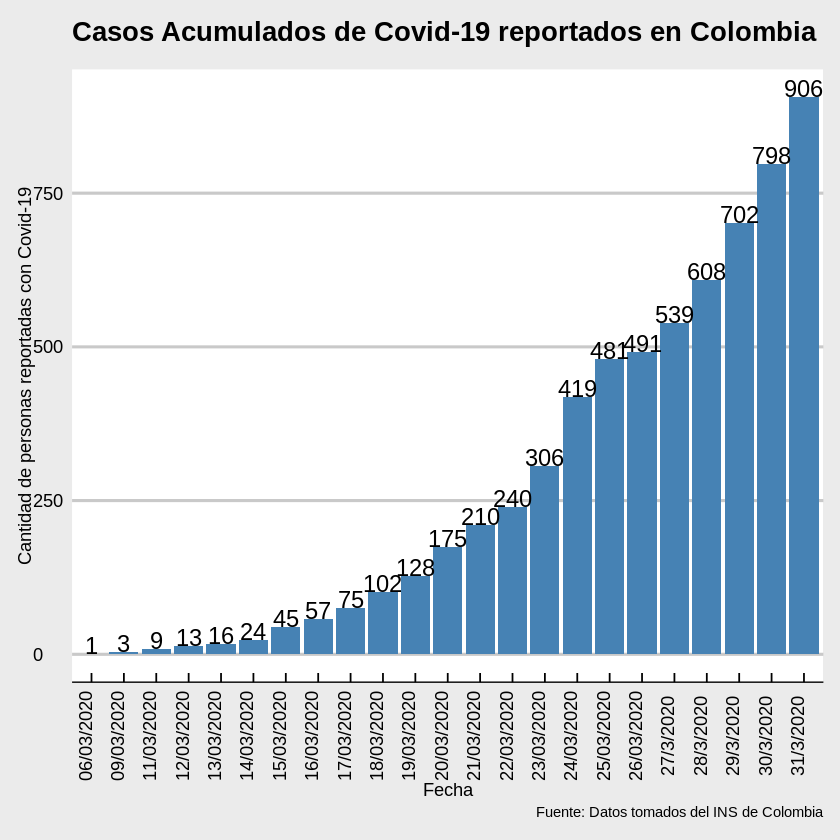

In [5]:
 CasosCol<-casos%>%
 ggplot (aes(x = `Fecha de diagnóstico`, y =  `Acumulados`)) + #Par ver el gráfico reportes diarios, cambiar `Acumulados` por n
  geom_bar(stat = "identity", fill= "steelblue" )+ #Pueden cambiar el color del gráfico por ejemplo "skyblue", "red"... entre otros. 
  labs(title = "Casos Acumulados de Covid-19 reportados en Colombia", subtitle = " ", #las etiquetas del gráfico.
       x = "Fecha", y = "Cantidad de personas reportadas con Covid-19", caption = "Fuente: Datos tomados del INS de Colombia")+
  geom_text(aes(label = `Acumulados`), vjust = 0, color="black", size=5.0, #ajustar el texto del gráfico, si van a cambiar a diarios, recuerden cambiar n por `Acumulados` 
            position = position_dodge(width=0.9))+
   theme_economist_white()+ #tema del gráfico, formato preestablecido
  theme(axis.text.x = element_text(angle = 90)) #rotar los labels de los ejes
CasosCol

Para hacer gráficos por ciudades o departamentos, se puede repetir el gráfico anterior pero con filtros según el lugar de interes. El ejemplo se muestra con Medellín pero lo pueden cambiar para ver cualquier ciudad de interés. 

In [6]:
unique(covidCol$`Ciudad de ubicación`)

[1] "Bogotá"            "Buga"              "Medellín"         
 [4] "Itagüí"            "Cartagena"         "Neiva"            
 [7] "Palmira"           "Villavicencio"     "Rionegro"         
[10] "Cali"              "Dosquebradas"      "Cúcuta"           
[13] "Manizales"         "Subachoque"        "Soacha"           
[16] "Barranquilla"      "Bucaramanga"       "Armenia"          
[19] "Pereira"           "Cajicá"            "Ibagué"           
[22] "Popayán"           "Viterbo"           "Anapoima"         
[25] "Envigado"          "Santa Marta"       "Chía"             
[28] "Madrid"            "Villa del Rosario" "Guarne"           
[31] "Bello"             "Calarcá"           "Valledupar"       
[34] "La Dorada"         "Chinchiná"         "BUCARAMANGA"      
[37] "San Andrés"        "Yumbo"             "Yopal"            
[40] "Guatapé"           "Barbosa"           "Cota"             
[43] "Sabaneta"          "Villamaría"        "Trujillo"         
[46] "Pacho"             "El Retiro"         "Apartado"         
[49] "Ipiales"           "Mosquera"          "La Unión"         
[52] "Cartago"           "Fusagasugá"        "La Calera"        
[55] "Villeta"           "Palermo"           "San Pedro"        
[58] "Darién"            "Funza"             "Tuluá"            
[61] "Soledad"           "El Dovio"          "Santana"          
[64] "Frontino"          "Tunja"             "Tocancipá"        
[67] "Puerto Colombia"   "Sahagún"           "Pasto"            
[70] "Polonuevo"         "Villapinzón"       "Montebello"       
[73] "Santa Rosa de Oso" "Turbaco"           "Sincelejo"        
[76] "Floridablanca"     "Lorica"            "Oicatá"           
[79] "Arjona"            "Sopó"              "Tumaco"           
[82] "Riohacha"          "Zipaquirá"         "Puerto Santander" 
[85] "Toguí"

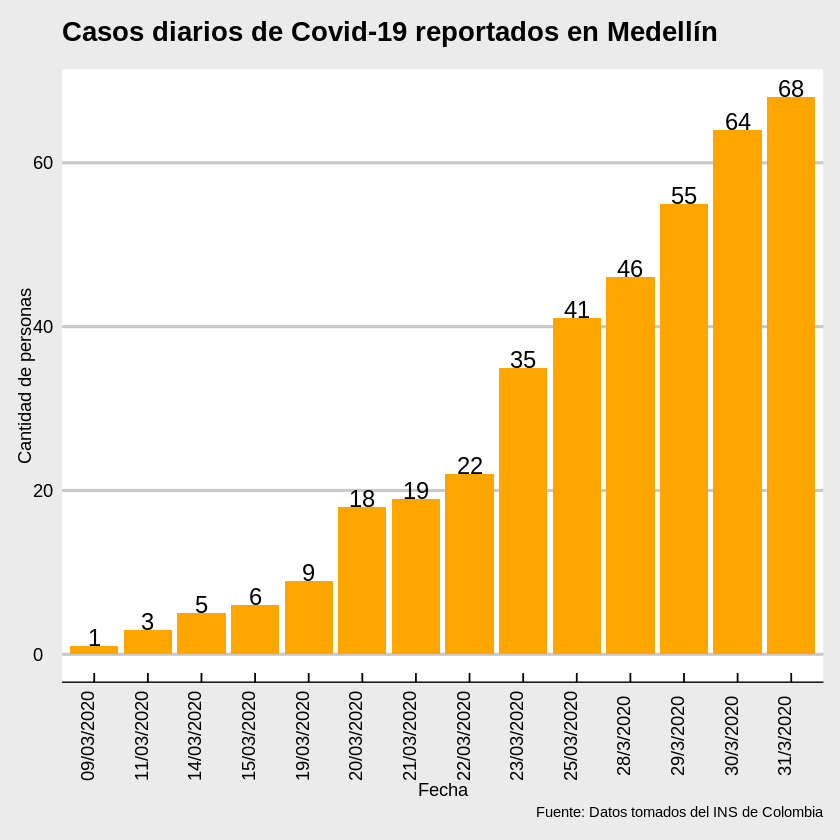

In [8]:
covidCol%>% filter(`Ciudad de ubicación`=="Medellín")%>% #Para hacer algúna ciudad específica, escribir el nombre entre comillas. Usa el resultado anterior para ver la ciudad
          group_by(`Fecha de diagnóstico`) %>% 
          summarise (n=n())%>% 
          mutate(Acumulados = cumsum(n))%>%
  
  ggplot (aes(x = `Fecha de diagnóstico`, y = Acumulados)) +  #se puede cambiar par ver un gráfico acumulado. 
  geom_bar(stat = "identity", fill= "orange" )+
  labs(title = "Casos diarios de Covid-19 reportados en Medellín", subtitle = " ", #Recuerda cambiar el título según la ciudad que quieras ver.
       x = "Fecha", y = "Cantidad de personas", caption = "Fuente: Datos tomados del INS de Colombia")+
  geom_text(aes(label = Acumulados ), vjust = 0, color="black", size=5.0,
            position = position_dodge(width=0.9))+
  theme_economist_white()+ 
  theme(axis.text.x = element_text(angle = 90)) #rotar los labels de los ejes

#Municipios con más de 30 casos de Covid_19 en Colombia
A continuación se crea un ciclo para ver los datos de los municipos que tienen más de 30 casos reportados. 

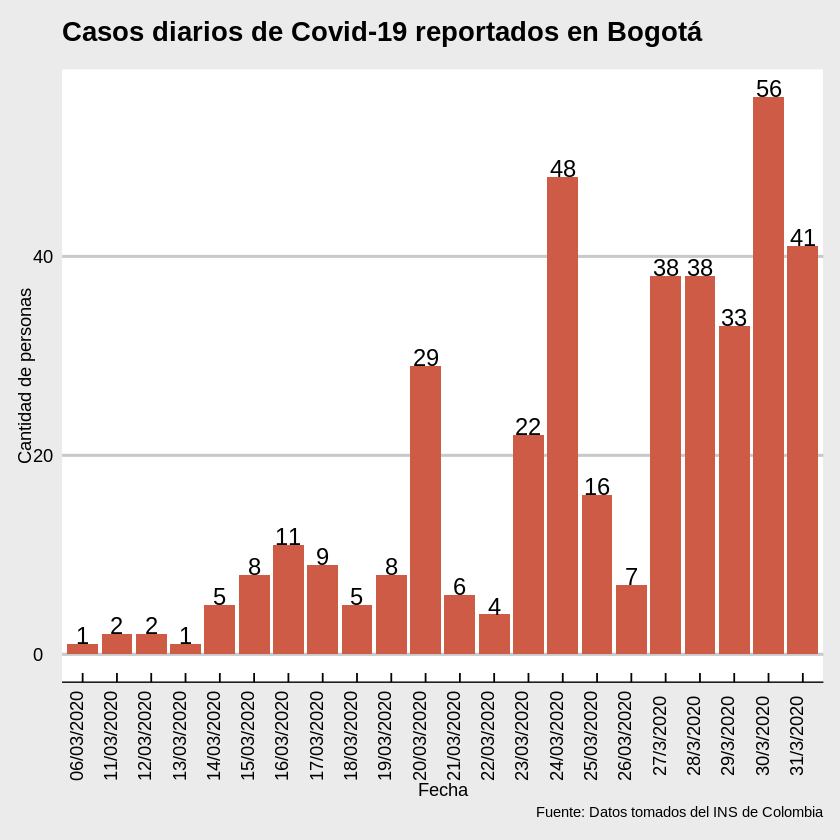

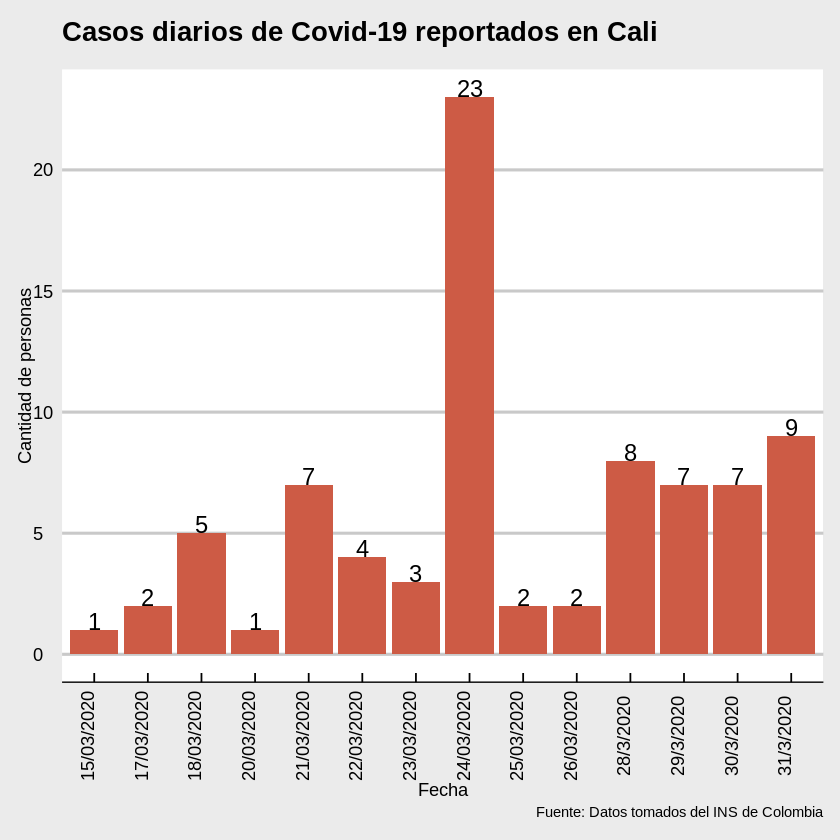

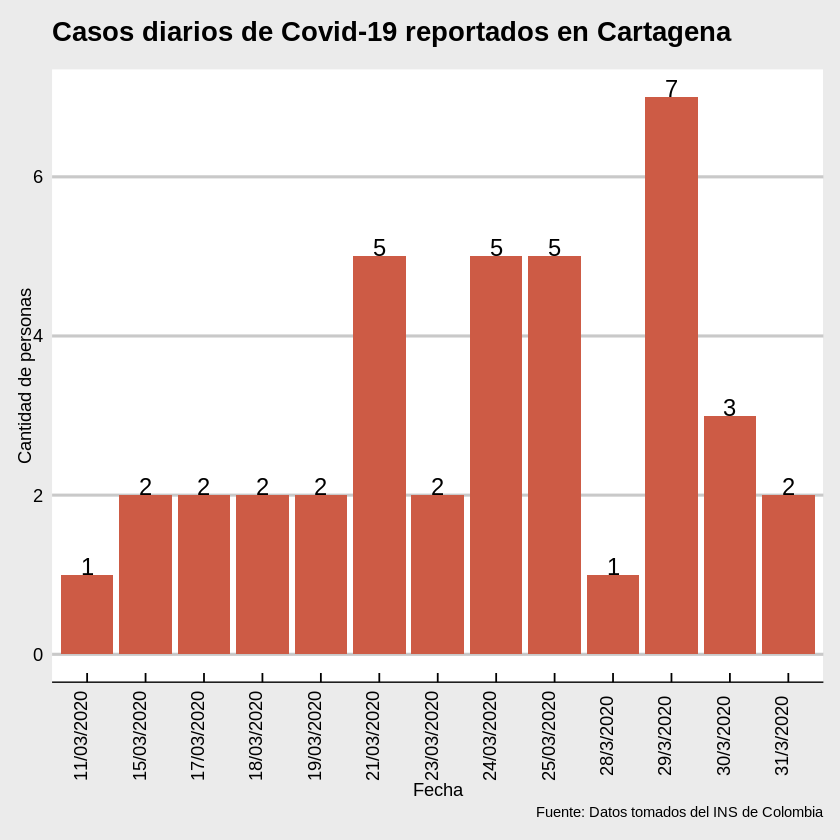

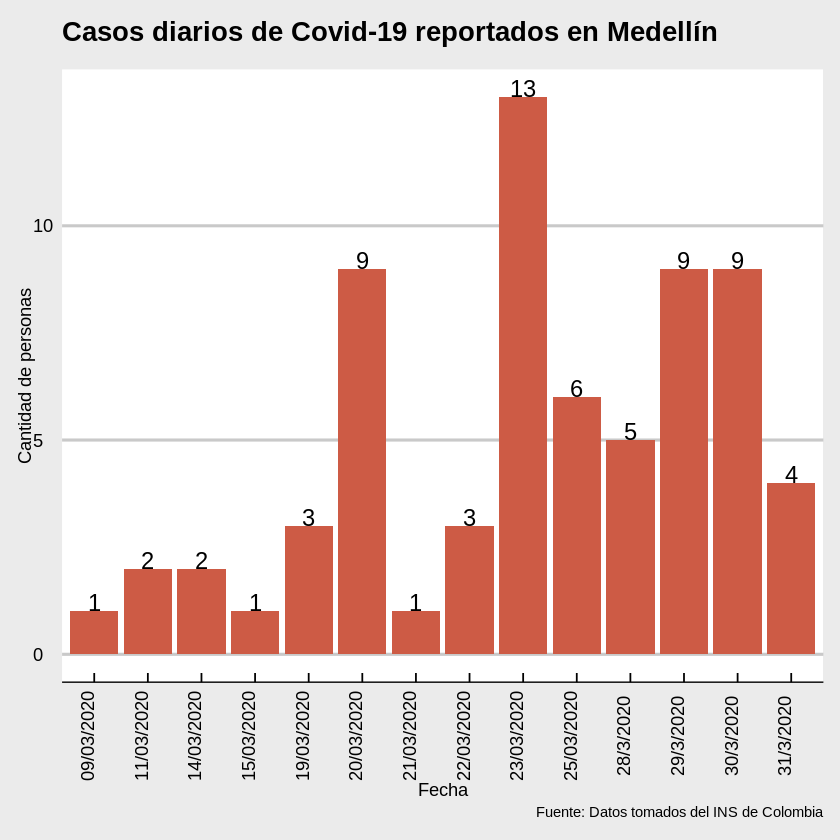

In [9]:
tab <- table(covidCol$`Ciudad de ubicación`)
municipio <- names(tab[tab>30])

for(mun in municipio){
  title <- paste("Casos diarios de Covid-19 reportados en",mun)
  
  graficoCasos <- covidCol%>% filter(`Ciudad de ubicación`==mun)%>%
          group_by(`Fecha de diagnóstico`) %>% 
          summarise (n=n())%>% 
          mutate(Acumulados = cumsum(n))%>%  
  ggplot (aes(x = `Fecha de diagnóstico`, y = n)) +  #se puede cambiar par ver un gráfico Acumulados. 
  geom_bar(stat = "identity", fill= "coral3" )+
  labs(title = title, subtitle = " ", #Recuerda cambiar el título según la ciudad que quieras ver.
       x = "Fecha", y = "Cantidad de personas", caption = "Fuente: Datos tomados del INS de Colombia")+
  geom_text(aes(label = n ), vjust = 0, color="black", size=5.0,
            position = position_dodge(width=0.9))+
  theme_economist_white()+ 
  theme(axis.text.x = element_text(angle = 90)) #rotar los labels de los ejes

  print(graficoCasos)
}


#Casos confirmados por ciudades
Un gráfico comparativo de casos totales en las ciudades de colombia. Se filtran las ciudades que tienen más de un caso. El gráfico se puede hacer con los departamentos, solo se aplica el filtro de `Departamento` donde se encuentra la frase `Ciudad de Ubicación`. 

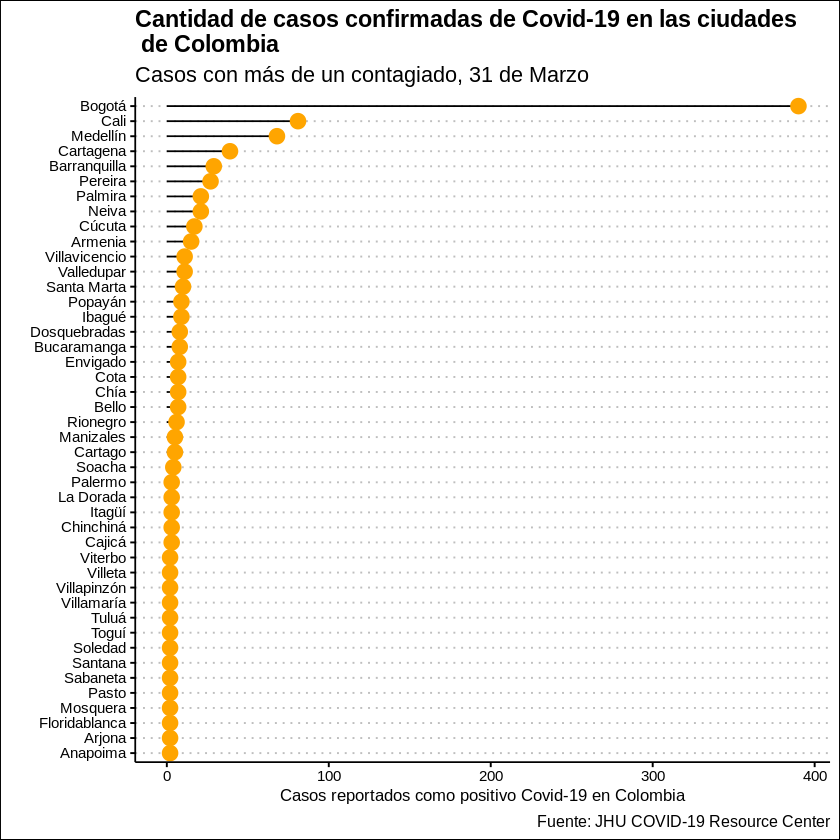

In [12]:
CasosCiudades <- covidCol %>% 
  group_by(`Ciudad de ubicación`) %>%
  summarise (n=n())%>%
  arrange(-n)
CasosCiudades %>% filter(n>1)%>%
  ggplot(aes(x= reorder(`Ciudad de ubicación`, n), y=n))+
  geom_segment( aes(xend=`Ciudad de ubicación`, yend=0)) +
  geom_point( size=4, color="orange") +
  labs(title = "Cantidad de casos confirmadas de Covid-19 en las ciudades\n de Colombia", subtitle = "Casos con más de un contagiado, 31 de Marzo",
       x = " ", y = "Casos reportados como positivo Covid-19 en Colombia", caption = "Fuente: JHU COVID-19 Resource Center")+
  coord_flip() +
  theme_clean()

#**Pirámide de población contagiada**
Se crea un archivo con nombre pyramid y se multiplica por menos 1 los datos para la categoría masculina M, para invertir las barras. Luego se realiza el ggplot. Al final de código se puede  habilitar la función facet_wrap() que permite ver gráficos por cada uno de los departamentos.

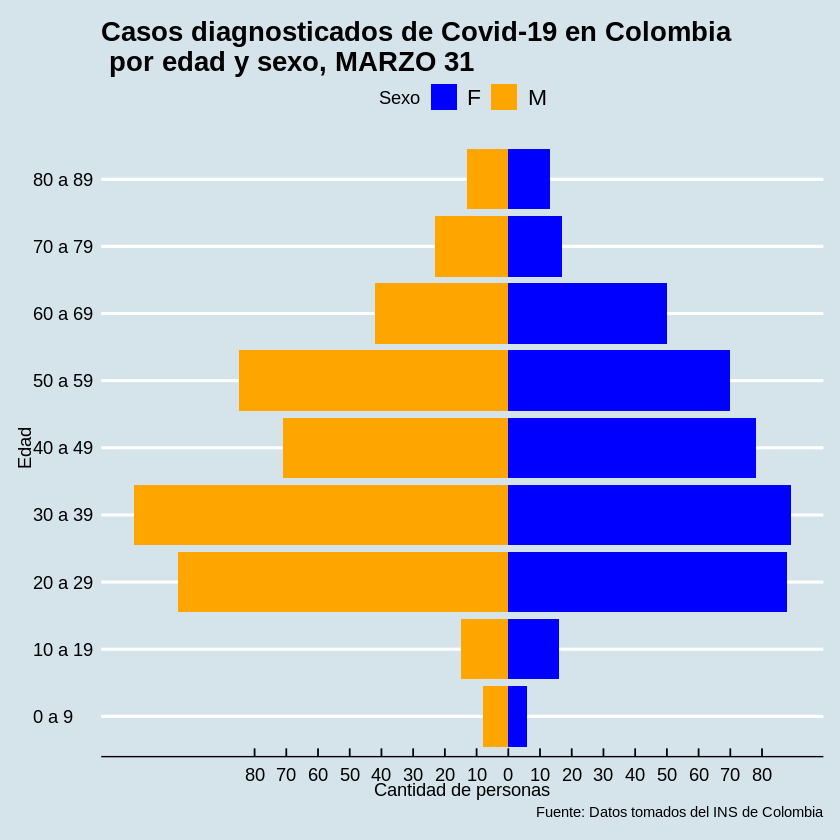

In [13]:
pyramid<-covidCol%>%group_by(Edad, Sexo, Departamento)%>%summarise(n=n())
pyramid$n <- ifelse(pyramid$Sexo == "M", -1*pyramid$n, pyramid$n)

ggplot(pyramid, aes(x = Edad, y = n, fill = Sexo)) + 
  geom_bar(data = subset(pyramid, Sexo == "F"), stat = "identity") +
  geom_bar(data = subset(pyramid, Sexo == "M"), stat = "identity")+
  coord_flip()+
  scale_y_continuous(breaks=seq(-80,80,10),labels=abs(seq(-80,80,10)))+  #define los límites de la cantidad de personas del gráfico 
  labs(title="Casos diagnosticados de Covid-19 en Colombia\n por edad y sexo, MARZO 31", y="Cantidad de personas", caption= "Fuente: Datos tomados del INS de Colombia")+
  scale_fill_manual("Sexo", values = c("F" = "blue", "M" = "orange"))+
  theme_economist() 
 # facet_wrap(~Departamento) #Para ver los resultado por departamento, solo deber remover el # que antecede la función facet_wrap()

#Casos según la atención
Es un gráfico que permite ver dónde se encuentra el paciente. Incluye la población que ha fallecido.  

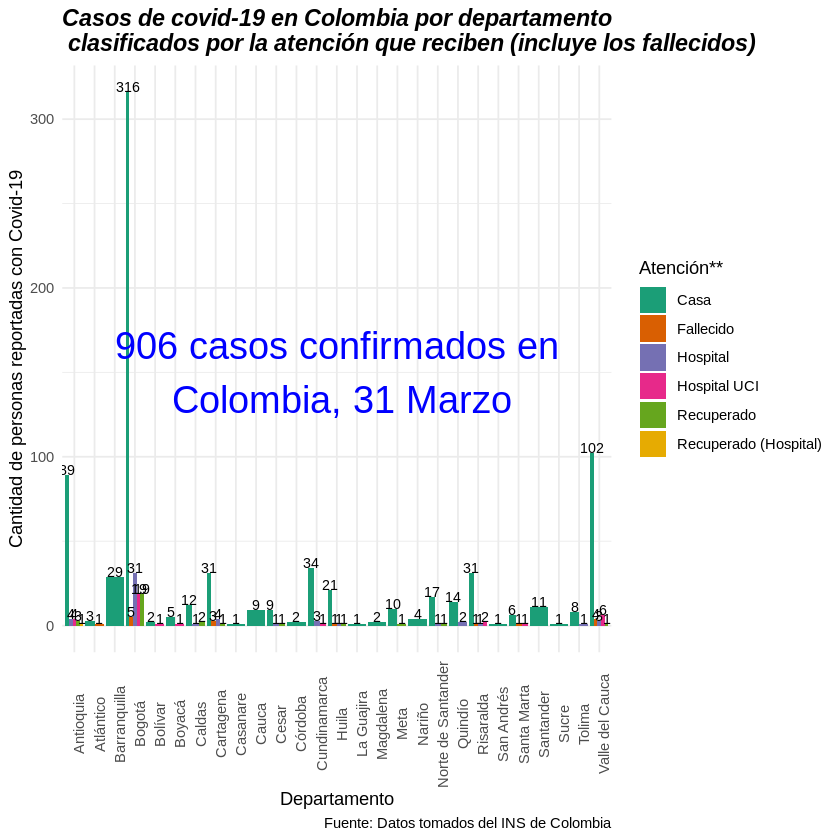

In [15]:
covidCol%>%
  group_by(`Atención**`, Departamento) %>% 
  summarise (n = n())%>%
   
ggplot(aes(x=Departamento, y= n, fill=`Atención**`))+
  geom_bar(stat = "identity", position = position_dodge())+
  geom_text(aes(x = Departamento, y = n, label = paste0("",n,"")), 
            size=3, vjust = 0, position = position_dodge(width=0.9))+
  scale_fill_brewer(palette="Dark2")+
  ggtitle("Casos de covid-19 en Colombia por departamento\n clasificados por la atención que reciben (incluye los fallecidos)")+
  labs(y = "Cantidad de personas reportadas con Covid-19", caption = "Fuente: Datos tomados del INS de Colombia")+
  theme_minimal()+
  theme (plot.title = element_text(color="black", size=14, face="bold.italic"))+
  theme(axis.text.x = element_text(angle = 90))+ #rotar los labels de los ejes
  annotate ("text", label = "906 casos confirmados en\n Colombia, 31 Marzo", x = "Huila", y = 150, size = 8, colour = "blue")

#Gráfico de población fallecida por departamentos.


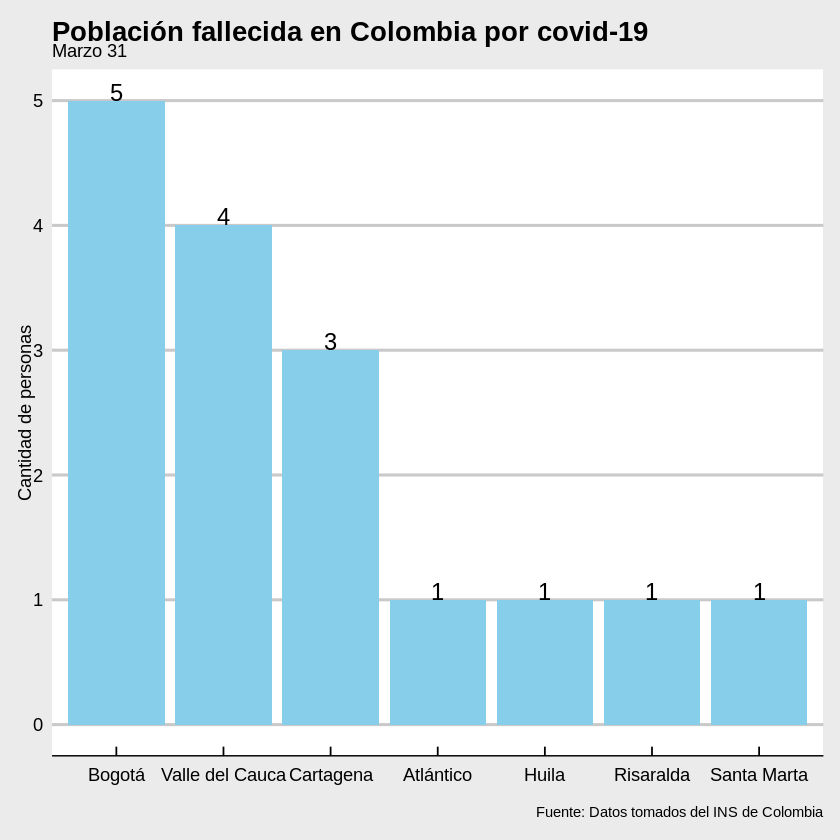

In [32]:
covidCol%>%group_by(Departamento,`Atención**`)%>%summarise(n=n())%>%filter(`Atención**`=="Fallecido")%>%
ggplot(aes(x=reorder(Departamento, -n), y=n))+
geom_bar(stat = "identity", fill="skyblue")+
labs(title="Población fallecida en Colombia por covid-19", x=" ", y="Cantidad de personas", 
      caption = "Fuente: Datos tomados del INS de Colombia", subtitle = "Marzo 31")+
geom_text(aes(x = Departamento, y = n, label = paste0("",n,"")), 
            size=5, vjust = 0, position = position_dodge(width=0.9))+
theme_economist_white()